# Applied Neural Networks Mid-Project

Due Tuesday 11am, March 31, 2020

Set up imports and download [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


**Question 1**<br/>
Explore and preprocess the CIFAR-10 datset. There should be 50 000 images in your training set and 10 000 images in your testing set. Each image is 32x32 pixels and each pixel has an RGB 3-vector. There are ten different classes.

In [ ]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
y_train_full.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train_full[:15]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9]], dtype=uint8)

In [ ]:
X_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

TypeError: ignored

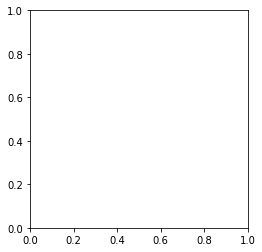

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap="binary")

In [ ]:
X_train_full = X_train_full/255
X_test = X_test/255

In [ ]:
X_train_full[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

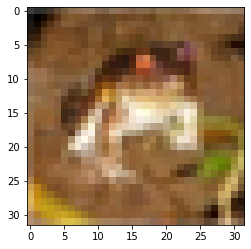

In [ ]:
plt.imshow(X_train_full[0],cmap='binary')

TypeError: ignored

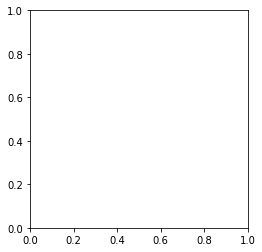

In [ ]:
index = 6
plt.imshow(X_train_full[index],cmap='binary')
plt.title(y_train_full[index])

In [ ]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog',
           'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
X_train_full = X_train_full.reshape(-1,3072)
X_test = X_test.reshape(-1,3072)

**Question 2**<br/>
Train an ANN with 4 hidden layers of 500 neurons each. Use an early stopping callback with a patience of 10 epochs. Show the model summary and architecture plot. Give the accuracy. Make sure to train the network on validation data and reserve your test data for evaluation. Plot the accuracy vs epoch. 

*Hint:* you might find <br/>
keras.layers.Flatten(input_shape=(32, 32, 3)) <br/>
useful as it will flatten your input without you needing to reshape the data


In [ ]:
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=1/10,
                                                                random_state=42)
X_train_tr.shape

(45000, 3072)

In [ ]:
X_train_v.shape

(5000, 3072)

In [ ]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Dense(500,activation="relu",input_shape=(3072,), 
                             name="1st_Hidden_Layer"))
model_1.add(keras.layers.Dense(500,activation="relu",
                             name="2nd_Hidden_Layer"))
model_1.add(keras.layers.Dense(500,activation="relu",
                             name="3rd_Hidden_Layer"))
model_1.add(keras.layers.Dense(500,activation="relu",
                             name="4th_Hidden_Layer"))
model_1.add(keras.layers.Dense(10,activation="softmax",
                             name="Output_Layer"))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_Hidden_Layer (Dense)     (None, 500)               1536500   
_________________________________________________________________
2nd_Hidden_Layer (Dense)     (None, 500)               250500    
_________________________________________________________________
3rd_Hidden_Layer (Dense)     (None, 500)               250500    
_________________________________________________________________
4th_Hidden_Layer (Dense)     (None, 500)               250500    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5010      
Total params: 2,293,010
Trainable params: 2,293,010
Non-trainable params: 0
_________________________________________________________________


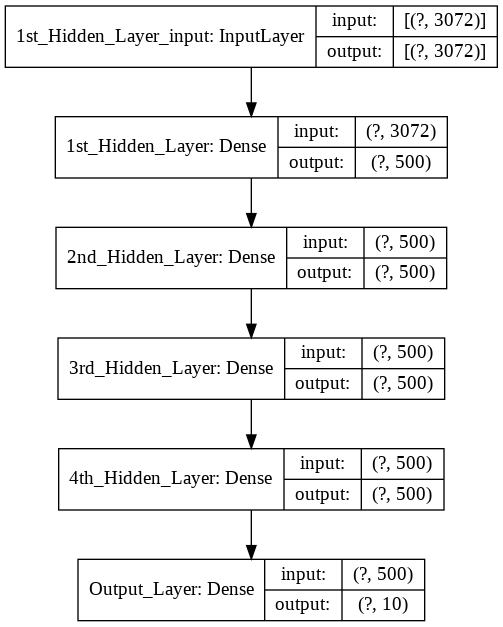

In [ ]:
keras.utils.plot_model(model_1,show_shapes=True)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.tf", save_best_only=True)

In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",
              metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True,
                                                  verbose=1)
history_01 = model_1.fit(X_train_tr,y_train_tr, epochs=100, batch_size=32,
                    validation_data=(X_train_v,y_train_v),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1390/1407 [============================>.] - ETA: 0s - loss: 1.8971 - accuracy: 0.3172WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: temp_model.tf/assets
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8949 - accuracy: 0.3180 - val_loss: 1.9943 - val_accuracy: 0.3074
Epoch 2/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6863 - accuracy: 0.3978 - val_loss: 1.6756 - val_accuracy: 0.3942
Epoch 3/100
1407/1407 [==============================] - 4s 2ms/step - loss: 1.5976 - accuracy: 0.4311 - val_loss: 1.7233 - val_accuracy: 0.3816
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/st

In [ ]:
history_01.params

{'epochs': 100, 'steps': 1407, 'verbose': 1}

In [ ]:
history_01.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
history_01.history

{'accuracy': [0.31797778606414795,
  0.39784443378448486,
  0.43111109733581543,
  0.4543333351612091,
  0.4741555452346802,
  0.48917776346206665,
  0.5019333362579346,
  0.5139333605766296,
  0.5248888731002808,
  0.5368444323539734,
  0.5418444275856018,
  0.5573111176490784,
  0.5651333332061768,
  0.5731555819511414,
  0.5822222232818604,
  0.5924444198608398,
  0.602222204208374,
  0.6114888787269592,
  0.6198444366455078,
  0.629444420337677],
 'loss': [1.8949075937271118,
  1.6862874031066895,
  1.59759521484375,
  1.5338512659072876,
  1.4817196130752563,
  1.4413903951644897,
  1.400705099105835,
  1.3678882122039795,
  1.338964581489563,
  1.3086631298065186,
  1.280965805053711,
  1.2507044076919556,
  1.2245372533798218,
  1.1976431608200073,
  1.1717822551727295,
  1.1461646556854248,
  1.1233718395233154,
  1.0932774543762207,
  1.0723929405212402,
  1.046810269355774],
 'val_accuracy': [0.3073999881744385,
  0.39419999718666077,
  0.3815999925136566,
  0.402200013399124

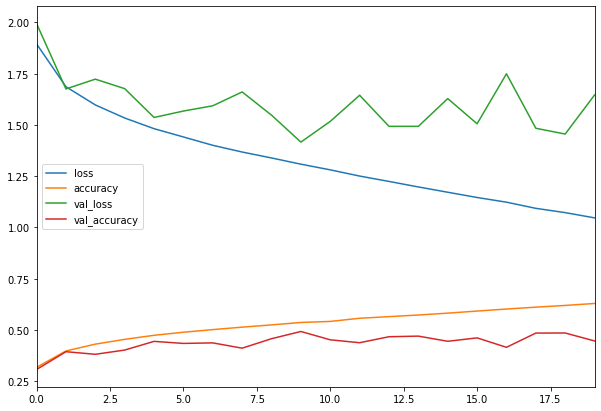

In [ ]:
import pandas as pd
pd.DataFrame(history_01.history).plot(figsize=(10,7))

In [ ]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3847 - accuracy: 0.5078


[1.3847264051437378, 0.5077999830245972]

**Question 3**<br/>
Use RandomizedSearchCV to tune your hyperparameters (you will need to use the Subclassing API). Check the following parameters: <br/>
number of hidden layers = [2, 4, 6, 8, 10] <br/>
number of neurons = [100, 400, 700, 1000, 1300] <br/>
learning rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2] <br/>

Which parameters performed best? Discuss.

In [ ]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Creating Subclass

class new_model(keras.models.Model):  # in python superclass is in ()
  def __init__(self, units=500, activation="relu", n_hidden=4, **kwargs):  # constructor (cannot overload in python), set default with =
    super().__init__(**kwargs)       # super() function will make the child class inherit all the methods and properties from its parent
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.output_main = keras.layers.Dense(10)
    self.n_hidden = n_hidden
  def call(self, inputs):  # keras uses for "forward" pass
    x = inputs
    x = self.hidden1(x)
    for layer in range(self.n_hidden):
      x = self.hidden2(x)
    output_main = self.output_main(x)
    return output_main

In [ ]:
# function to build neural net
def build_model(n_hidden=1, n_neurons=500, learning_rate=3e-3): # setting up default values
  model_cus = new_model(units=n_neurons,activation="relu", n_hidden=n_hidden)
  model_cus.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=learning_rate),
                metrics=["accuracy"])
  return model_cus

In [ ]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [ ]:
keras_class.fit(X_train_tr,y_train_tr, epochs=10, 
              validation_data=(X_train_v,y_train_v),
              callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 6.3567 - accuracy: 0.0996 - val_loss: 6.8064 - val_accuracy: 0.1008
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 6.7777 - accuracy: 0.0999 - val_loss: 6.8064 - val_accuracy: 0.1008
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 6.7766 - accuracy: 0.0999 - val_loss: 6.8064 - val_accuracy: 0.1008
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 6.7777 - accuracy: 0.0999 - val_loss: 6.8064 - val_accuracy: 0.1008
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 6.7745 - accuracy: 0.0999 - val_loss: 6.8064 - val_accuracy: 0.1008
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 6.7766 - accuracy: 0.0999 - val_loss: 6.8064 - val_accuracy: 0.1008


In [ ]:
# RandomizedSearchCV parameters

from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [2, 4, 6, 8, 10],
    "n_neurons": [100, 400, 700, 1000, 1300],
    "learning_rate": [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
}

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3, verbose=1)
rnd_search_cv.fit(X_train_tr,y_train_tr, epochs=100, validation_data=(X_train_v,y_train_v),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: 10.5865 - accuracy: 0.0992 - val_loss: 9.5176 - val_accuracy: 0.1054
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 9.6765 - accuracy: 0.0997 - val_loss: 9.5148 - val_accuracy: 0.1054
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 9.6705 - accuracy: 0.0997 - val_loss: 9.5122 - val_accuracy: 0.1054
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 9.7214 - accuracy: 0.0997 - val_loss: 9.5626 - val_accuracy: 0.1054
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 9.7238 - accuracy: 0.0997 - val_loss: 9.5626 - val_accuracy: 0.1054
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 9.7195 - accuracy: 0.0997 - val_loss: 9.5626 - val_accuracy: 0.1054
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 9.7233 - accuracy: 0.0997 - val_loss: 9.5626 - val_accuracy: 0.105

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 23.1min finished


Epoch 1/100
1407/1407 [==============================] - 5s 4ms/step - loss: 2.8282 - accuracy: 0.1731 - val_loss: 2.1608 - val_accuracy: 0.1064
Epoch 2/100
1407/1407 [==============================] - 5s 4ms/step - loss: 2.0969 - accuracy: 0.2225 - val_loss: 2.0564 - val_accuracy: 0.2714
Epoch 3/100
1407/1407 [==============================] - 5s 4ms/step - loss: 4.1335 - accuracy: 0.1049 - val_loss: 3.7548 - val_accuracy: 0.1006
Epoch 4/100
1407/1407 [==============================] - 5s 4ms/step - loss: 3.8001 - accuracy: 0.0999 - val_loss: 3.7488 - val_accuracy: 0.1006
Epoch 5/100
1407/1407 [==============================] - 5s 4ms/step - loss: 3.7779 - accuracy: 0.0999 - val_loss: 3.7116 - val_accuracy: 0.1006
Epoch 6/100
1407/1407 [==============================] - 5s 4ms/step - loss: 3.4428 - accuracy: 0.0999 - val_loss: 2.2430 - val_accuracy: 0.1006
Epoch 7/100
1407/1407 [==============================] - 5s 4ms/step - loss: 2.2410 - accuracy: 0.0999 - val_loss: 2.3026 - val_ac

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f48a0524a58>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.0001, 0.0003, 0.001,
                                                          0.003, 0.01, 0.03],
                                        'n_hidden': [2, 4, 6, 8, 10],
                                        'n_neurons': [100, 400, 700, 1000,
                                                      1300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.001, 'n_hidden': 10, 'n_neurons': 1000}

In [ ]:
rnd_search_cv.best_score_

0.11488889157772064

In [ ]:
rnd_search_cv.best_estimator_

## The best score found is 0.1148 which is very low and best parameter found at learning rate 0.001 and the number of hidden layer is 10 and number of neuron in each hidden layer is 1000. RandomsearchCV do not work with all combination of the parameter like gridsearchCV. That could be a reason for getting low accuracy.

**Question 4**<br/>
Do at least one more thing to change your neural network.<br/>
Describe the best neural network you found in this project. Include the plot of accuracy vs epoch, and plots of five typical misclassifications. Give the accuracy of this best model for each class (is it better/worse at classifying some classes?).

## I am building the neural network with functional API with 2 hidden layer which consists of 500 neuron each.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=(3072,))
hidden1 = keras.layers.Dense(500,activation="relu")(input_)
hidden2 = keras.layers.Dense(500,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(10,activation="softmax")(concat)
model_2 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3072)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          1536500     input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          250500      dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3572)         0           input_1[0][0]                    
                                                                 dense_1[0][0]                

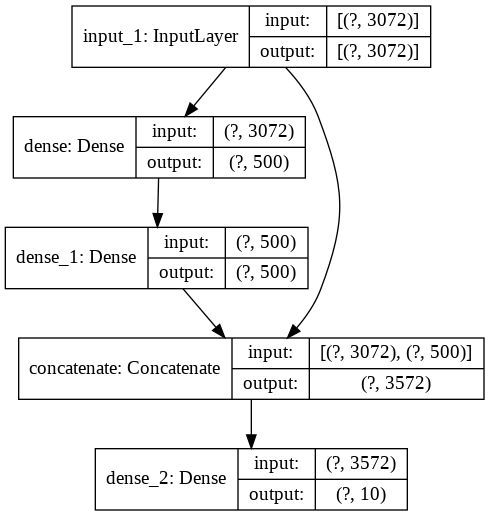

In [ ]:
keras.utils.plot_model(model_2,show_shapes=True)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.tf", save_best_only=True)

In [ ]:
model_2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",
              metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True,
                                                  verbose=1)
history_2 = model_2.fit(X_train_tr,y_train_tr, epochs=30, batch_size=32,
                    validation_data=(X_train_v,y_train_v),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9357 - accuracy: 0.3087 - val_loss: 1.8270 - val_accuracy: 0.3538
Epoch 2/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7898 - accuracy: 0.3712 - val_loss: 1.9292 - val_accuracy: 0.3268
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7191 - accuracy: 0.3953 - val_loss: 1.7830 - val_accuracy: 0.3686
Epoch 4/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6630 - accuracy: 0.4120 - val_loss: 1.9729 - val_accuracy: 0.3068
Epoch 5/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6164 - accuracy: 0.4305 - val_loss: 1.9719 - val_accuracy: 0.3378
Epoch 6/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.5773 - accuracy: 0.4432 - val_loss: 1.8005 - val_accuracy: 0.3638
Epoch 7/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.5403 - accuracy: 0.4579 - val_loss: 1.7970 - val_accuracy:

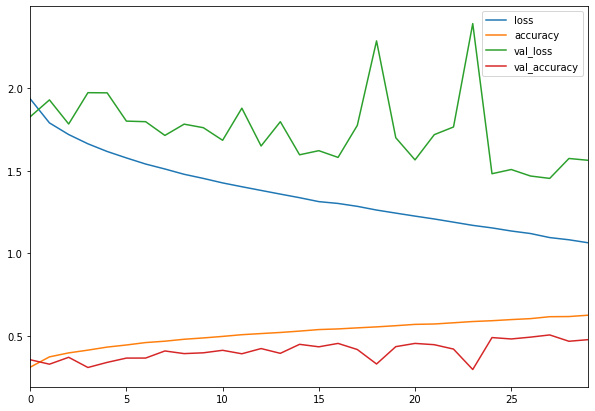

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5457 - accuracy: 0.4809


[1.5456732511520386, 0.48089998960494995]

## The best model I found in this project by sequential API which is model_1 and the test accuracy of this model is 0.50.

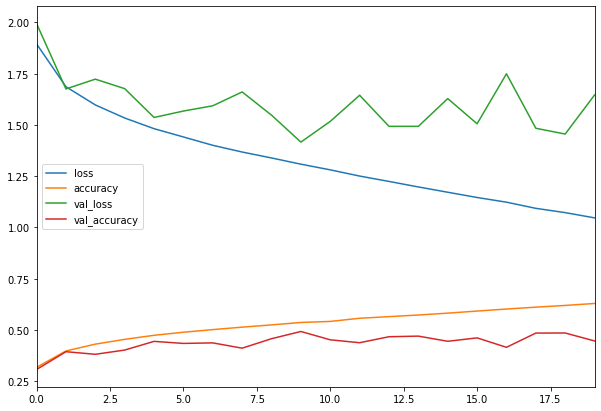

In [ ]:
# Plot of Accuracy vs Epoch (from best model)

pd.DataFrame(history_01.history).plot(figsize=(10,7))

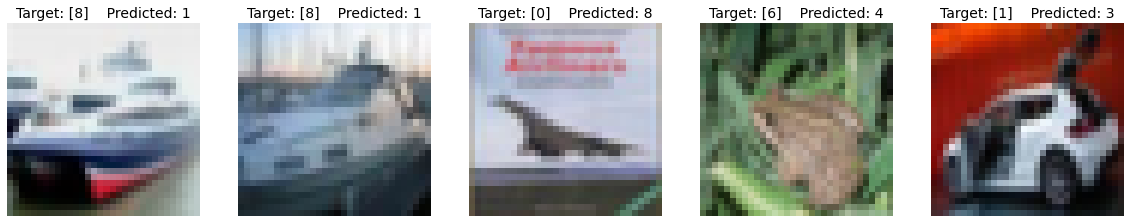

In [ ]:
# Display misclassified images from best model
import matplotlib.pyplot as plt

predictions = model_1.predict_classes(X_test[:])
misclassifiedIndexes = []
index = 0
for target, prediction in zip(y_test, predictions):
  if target != prediction:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(32,32,3))
  plt.axis('off')
  plt.title(f'Target: {y_test[misclassifiedIndexes[index]]}    Predicted: {predictions[misclassifiedIndexes[index]]}', fontsize=14)

plt.show()

In [ ]:
# Accuracy for each class

from sklearn.metrics import classification_report
import numpy as np

y_pred = model_1.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.46      0.54      1000
           1       0.60      0.67      0.63      1000
           2       0.37      0.43      0.40      1000
           3       0.35      0.36      0.35      1000
           4       0.49      0.38      0.43      1000
           5       0.43      0.39      0.41      1000
           6       0.50      0.62      0.56      1000
           7       0.60      0.54      0.57      1000
           8       0.66      0.63      0.64      1000
           9       0.49      0.62      0.54      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



## If we see the individual class accuracy, then we can see the worse accuracy for class 3 where we are getting the best accuracy for class 8. 


Note that convolution neural networks will be better predictors on this dataset than ANNs. We will revisit this in the final project (for undergraduates).